## Text Processing

### Set up environment 

In [67]:
# set up environment
import nltk
import spacy
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from nltk import word_tokenize, pos_tag 
from nltk.stem import PorterStemmer as stemmer
from nltk.stem import WordNetLemmatizer as lemmatizer
from nltk.corpus import wordnet # for robust lemmatization
from nltk.corpus import stopwords as stop

### Data import 

To complete our text processing, we need to download several datasets: 

In [3]:
nltk.download('punkt') # tokenization
nltk.download('wordnet') # lemmatization
nltk.download('stopwords') # stop words
nltk.download('averaged_perceptron_tagger') # POS tagging
nltk.download('maxent_ne_chunker' ) # entity extraction
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abelsandoval/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abelsandoval/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abelsandoval/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/abelsandoval/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/abelsandoval/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/abelsandoval/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

### Text import

In [4]:
# open text file 
with open('alice.txt', 'r') as file:
    story = file.read()

# preview our data
print(story[:500]+"…")

CHAPTER I.
Down the Rabbit-Hole
Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, “and what is the use of a book,” thought Alice “without pictures or conversations?”

So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain wo…


Our data is loaded into one long string. Now, we need to examine the character length of the story: 

In [8]:
print(len(story))

143831


### Tokenization

Now that our story is imported into one long string, we need to use tokenization. Tokenization is helpful for separating and extracting words. The process itself uses spaces and punctuation marks meaning that the punctuation will be included as well. 

In [40]:
# tokenization 
tokens = word_tokenize(story)
tokens[:10] 

['CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit-Hole',
 'Alice',
 'was',
 'beginning',
 'to']

### Part of Speech tagging 

Since words are all parts of speech, we need to be able to identify them. To do this, we can use NLTK's POS tagging: 

In [41]:
# parts of speech tagging 
pos = pos_tag(tokens)
pos[:10]

[('CHAPTER', 'NN'),
 ('I', 'PRP'),
 ('.', '.'),
 ('Down', 'RP'),
 ('the', 'DT'),
 ('Rabbit-Hole', 'JJ'),
 ('Alice', 'NNP'),
 ('was', 'VBD'),
 ('beginning', 'VBG'),
 ('to', 'TO')]

### Stemming and Lemmatizing 

Since words use infelctions for different tenses, cases, etc., we can use stemming and lemmatizing to extract the word stem or lemma. To compare the two, stemming is a lot more simplistic. Lemmatization is more reliable, but is computationally more expensive. For the purposes of this analysis, we are goingn to use lemmatization. 

To simplify, we are going to define two functions for lemmatizing both verbs and nouns. The functions both take in a word (which becomes lowercase) and parts of speech word type, which we have from our POS tagging. 

In [42]:
# lemmatizing verbs function 
def lemmatize_verb(word): 
    return lemmatizer().lemmatize(word.lower(), pos=wordnet.VERB)

# lemmatizing nouns function 
def lemmatize_noun(word): 
    return lemmatizer().lemmatize(word.lower(), pos=wordnet.NOUN)

In [43]:
# lemmatize words whose POS tag begins with 'V'
verbs = [lemmatize_verb(word[0]) for word in pos if word[1][0]=='V']

# print
print(verbs[:50])

['be', 'begin', 'get', 'sit', 'have', 'do', 'twice', 'have', 'peep', 'be', 'read', 'have', 'be', 'think', 'be', 'consider', 'make', 'make', 'be', 'get', 'pick', 'run', 'be', 'do', 'think', 'hear', 'say', 'be', 'think', 'occur', 'have', 'wonder', 'seem', 'take', 'look', 'hurry', 'start', 'flash', 'have', 'see', 'take', 'burn', 'run', 'be', 'see', 'pop', 'go', 'consider', 'be', 'get']


In [44]:
# lemmatize words whose POS tag begins with 'N'
nouns = [lemmatize_noun(word[0]) for word in pos if word[1][0]=='N']

# print
print(nouns[:50])

['chapter', 'alice', 'sister', 'bank', 'nothing', 'book', 'sister', 'picture', 'conversation', '“', 'use', 'book', '”', 'alice', '“', 'picture', 'conversation', '”', 'mind', 'day', 'pleasure', 'daisy-chain', 'trouble', 'daisy', 'white', 'rabbit', 'eye', 'nothing', 'alice', 'way', 'rabbit', 'dear', '”', 'afterwards', 'time', 'rabbit', 'watch', 'waistcoat-pocket', 'alice', 'foot', 'mind', 'rabbit', 'waistcoat-pocket', 'watch', 'curiosity', 'field', 'time', 'hedge', 'moment', 'alice']


### Extract Entity Types

Now that we have identified the word types, we can now distinguish between different entitiy types such as persons, places, organizations, etc. To do this, we can use spacy's statistical models for natural language processing: 

In [45]:
# load english language model 
nlp = spacy.load('en_core_web_sm') 

In [46]:
# nlp processing 
doc = nlp(story) 

# get tuples of text and entity label 
entities = [(e.text, e.label_) for e in doc.ents if e.text] 

# preview entities 
entities[:20]

[('CHAPTER I.\n', 'ORG'),
 ('Alice', 'PERSON'),
 ('Alice', 'PERSON'),
 ('Rabbit', 'FAC'),
 ('Rabbit', 'LOC'),
 ('Alice', 'PERSON'),
 ('Alice', 'PERSON'),
 ('Alice', 'PERSON'),
 ('First', 'ORDINAL'),
 ('one', 'CARDINAL'),
 ('ORANGE MARMALADE', 'WORK_OF_ART'),
 ('Alice', 'PERSON'),
 ('four thousand miles', 'QUANTITY'),
 ('Alice', 'PERSON'),
 ('Alice', 'PERSON'),
 ('Longitude', 'PERSON'),
 ('Antipathies', 'ORG'),
 ('New Zealand', 'GPE'),
 ('Australia', 'GPE'),
 ('Alice', 'PERSON')]

After extracting each of the entities, we can see that some results are inaccurate, such as 'Longitude' being classified as a person. 

### Remove stop words 

Stop words, such as 'the', 'is', 'or', etc., are called stop words. To continue with our analysis, we need to remove all of our stop words using NLTK. In addition, we are adding 'chapter' to our stopwords since it appears throughout our story. 

In [47]:
# pull english stopwords
stopwords = stop.words('english')

# add stopword 
stopwords.append('chapter')

print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Now that we have pulled all our stopwords, we can now remove them:

In [48]:
# tokenization 
tokens = word_tokenize(story.lower())

# pull tokens with only letters 
words = [word for word in tokens if word.isalpha()]

# remove stopwords 
wo_stopwords = [word for word in words if word not in stopwords]

print(wo_stopwords[:50])

['alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', 'use', 'book', 'thought', 'alice', 'without', 'pictures', 'conversations', 'considering', 'mind', 'well', 'could', 'hot', 'day', 'made', 'feel', 'sleepy', 'stupid', 'whether', 'pleasure', 'making', 'would', 'worth', 'trouble', 'getting', 'picking', 'daisies', 'suddenly', 'white', 'rabbit', 'pink', 'eyes', 'ran', 'close', 'nothing', 'remarkable']


### Bag of Words 

Text documents are often represented using a bag-of-words model which usually consists of words and their respective frequency.  

In [50]:
# bag of words 
bag = {}

# word count and append
for word in wo_stopwords: 
    bag[word] = words.count(word)
    
# create sorted list of tuples 
words_freq = sorted(bag.items(), key=lambda x : x[1], reverse=True)

print(words_freq[:50])

[('said', 458), ('alice', 397), ('little', 127), ('one', 101), ('like', 84), ('would', 83), ('went', 83), ('could', 77), ('queen', 75), ('thought', 74), ('know', 72), ('time', 67), ('see', 65), ('king', 63), ('well', 58), ('began', 58), ('turtle', 57), ('mock', 56), ('quite', 55), ('hatter', 55), ('gryphon', 55), ('much', 51), ('way', 51), ('go', 50), ('think', 49), ('thing', 49), ('say', 48), ('first', 48), ('head', 48), ('rabbit', 47), ('voice', 47), ('get', 46), ('never', 46), ('looked', 45), ('come', 45), ('got', 45), ('must', 44), ('duchess', 42), ('round', 41), ('came', 40), ('tone', 40), ('dormouse', 40), ('oh', 39), ('great', 39), ('mouse', 39), ('back', 38), ('two', 38), ('cat', 37), ('nothing', 33), ('large', 33)]


### Words by Type 

So far, we have pulled all of the words from our text file. However, we can also identify all of the different word types present within our data. 

In [71]:
# tokenize and generate parts of speech 
pos = pos_tag(word_tokenize(story))

# words and types list 
words = [] 
types = [] 

# get word/type pairs from pos list 
for pair in pos: 
    # get word and lowercase 
    word = pair[0].lower()
    
    # get type 
    typ = pair[1]
    
    # remove punctuation, numbers, and stopwords 
    if word.isalpha() and word not in stopwords: 
        # append word to list 
        words.append(word)
        
        # append word type to list 
        if   (typ[0]=='J'): types.append('Adjective')
        elif (typ[0]=='N'): types.append('Noun')
        elif (typ[0]=='R'): types.append('Adverb')
        elif (typ[0]=='V'): types.append('Verb')
        else: types.append('Other')

In [80]:
# check words and types list 
print(words[:10])
print(types[:10])

['alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped']
['Noun', 'Verb', 'Verb', 'Adjective', 'Verb', 'Noun', 'Noun', 'Noun', 'Verb', 'Verb']


### Data Visualizations 

#### Wordcloud

Although wordclouds are not the best visualizations, they are quite simple. Here, we use a wordcloud generator and matplotlib: 

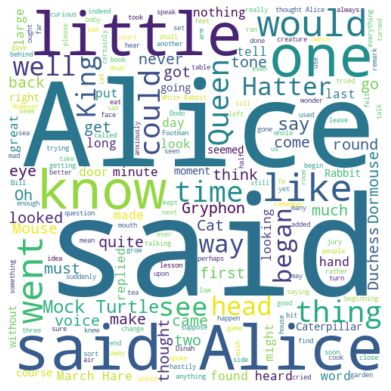

In [57]:
wc = WordCloud(
    width = 500, 
    height = 500, 
    background_color = 'white', 
    stopwords = stopwords
    ).generate(story)

# display options 
dpi = 72
plt.figure(figsize = (500/dpi, 500/dpi), dpi=dpi)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Wordcloud with Alice Mask 

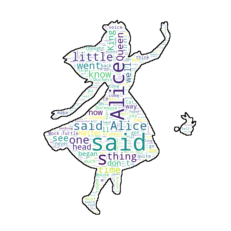

<Figure size 432x288 with 0 Axes>

In [70]:
with open('alice.txt', 'r', encoding='utf-8') as file: 
    story = file.read()
    
alice_mask = np.array(Image.open('alice_mask.png'))

wc = WordCloud(
    background_color = 'white', 
    max_words = 3000, 
    mask = alice_mask, 
    contour_width = 4, 
    contour_color = 'black'
    ).generate(story)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.figure()
plt.show()

#### Common Words

Aside from the wordcloud, we can also use a bar chart to visualize other aspects of our text data such as common words. Below, we can visualize the top 20 words found in our words_freq list. 

In [100]:
# create a dataframe 
wf = pd.DataFrame(words_freq, columns=['word', 'count'])

# create barchart of top 20 words 
alt.Chart(wf[:20]).mark_bar().encode(
    x = 'count:Q', 
    y = alt.Y('word:N', sort='-x')
).properties(title='Alice in Wonderland Top 20 Common Words')

alt.Chart(...)

Using data from our words by type, we can visualize both the most common words and word types: 

In [89]:
# create a dataframe 
wt = pd.DataFrame({'word': words, 'type': types})

# too much data, reduce to top 100 
index = wt['word'].isin(wf['word'][:100])
dfs = wt[index].reset_index(drop=True)

In [102]:
# selection filter 
selection = alt.selection(type='multi', fields=['type'])

# base chart 
base = alt.Chart(dfs)

# types chart 
tchart = base.mark_bar().encode(
    x = alt.X('type:N', sort='-y'), 
    y = alt.Y('count()'), 
    opacity = alt.condition(selection, alt.value(1), alt.value(0.25))
).add_selection(selection) 

# word chart 
wchart = base.mark_bar().encode(
    x = alt.X('word:N', sort='-y'), 
    y = alt.Y('count()')
).properties(title='Alice in Wonderland Top 100 Words by Type').transform_filter(selection)

tchart | wchart

alt.HConcatChart(...)

Above, we can see the top 100 words in Alice in Wonderland by type. The type chart on the left is interactive and allows for the filtering of words by type. The word chart to the right reacts to the selected type on the left chart. 